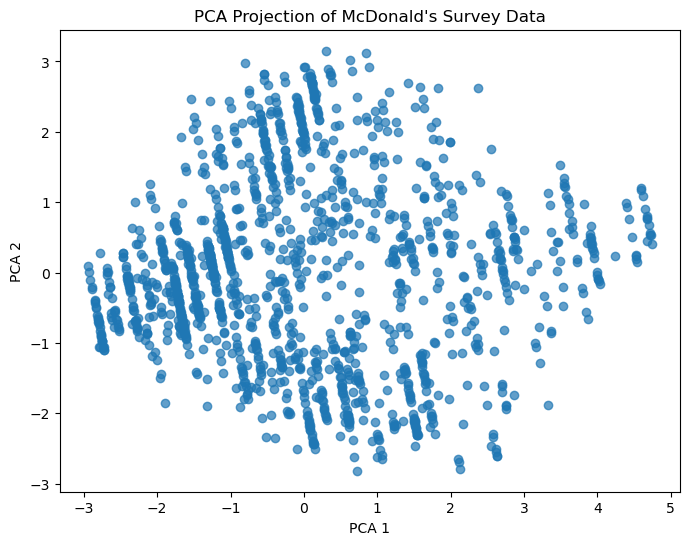

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import networkx as nx

df = pd.read_csv('mcdonalds.csv')   # replace with actual path

# Convert Yes/No to 1/0
binary_cols = ['yummy','convenient','spicy','fattening','greasy',
               'fast','cheap','tasty','expensive','healthy','disgusting','Like']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])   # Male=0, Female=1
df['VisitFrequency'] = le.fit_transform(df['VisitFrequency'])

features = df.drop(columns=['Like'])  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Projection of McDonald's Survey Data")
plt.show()


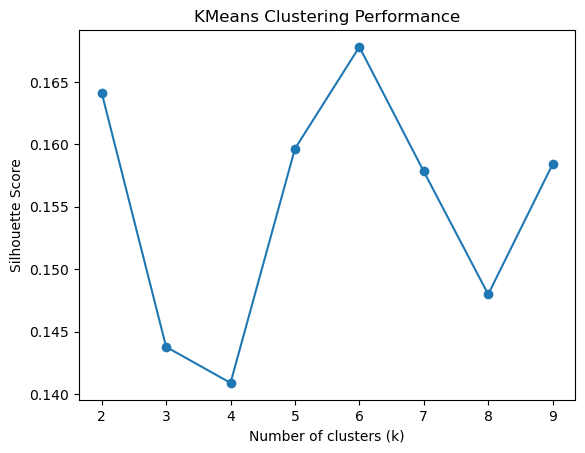

In [15]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    scores.append(silhouette_score(scaled_data, labels))

plt.plot(K, scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("KMeans Clustering Performance")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)


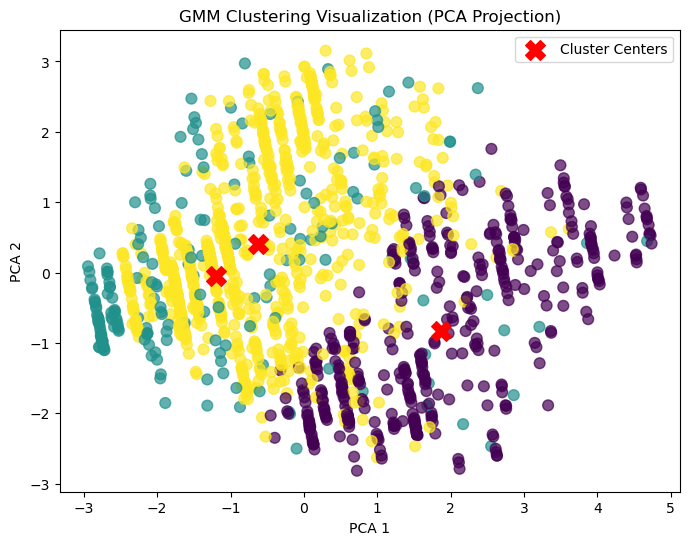

In [16]:

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], 
            c=df['Cluster_GMM'], cmap='viridis', s=60, alpha=0.7)

centers = gmm.means_ @ pca.components_.T   # project means into PCA space
plt.scatter(centers[:,0], centers[:,1], 
            c='red', marker='X', s=200, label='Cluster Centers')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("GMM Clustering Visualization (PCA Projection)")
plt.legend()
plt.show()


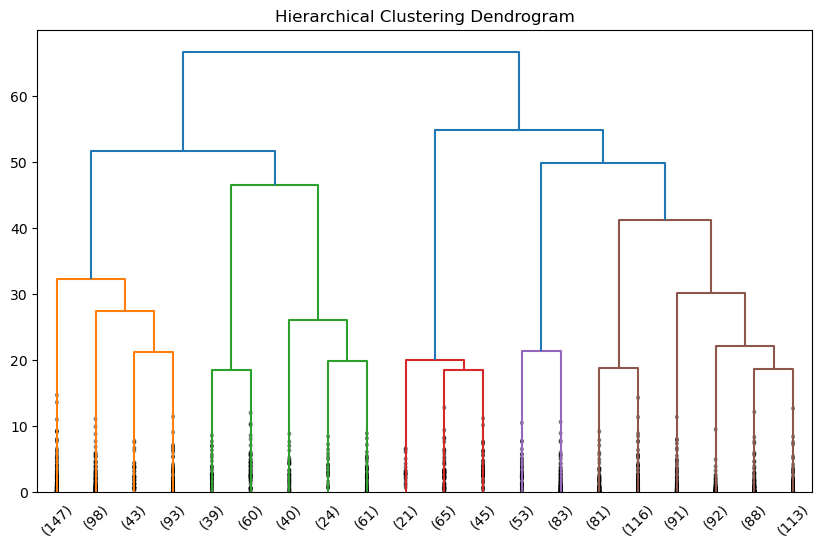

In [17]:
# Hierarchical Cliustering
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


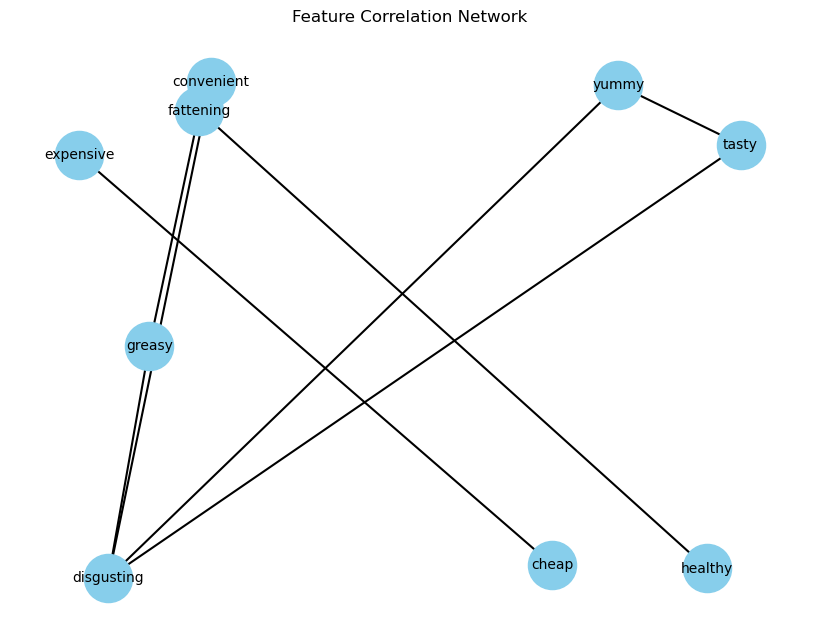

In [18]:
#Feature Network
corr = df[binary_cols].corr()

G = nx.Graph()
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i,j]) > 0.3:  # threshold
            G.add_edge(i, j, weight=corr.loc[i,j])

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="skyblue", font_size=10, width=1.5)
plt.title("Feature Correlation Network")
plt.show()


In [19]:
df.head

<bound method NDFrame.head of       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  \
0             1   